EDA

In [2]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset
titanic_df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows to confirm it's loaded
display(titanic_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Count the number of null values per column
missing_values = titanic_df.isnull().sum()

# Display the results
print("--- Missing values per column before dropping Embarked NaNs ---")
print(missing_values)

# Drop rows where 'Embarked' is null
titanic_df.dropna(subset=['Embarked'], inplace=True)

# Count the number of null values per column after dropping Embarked NaNs
missing_values_after_drop_embarked = titanic_df.isnull().sum()
print("\n--- Missing values per column after dropping Embarked NaNs ---")
print(missing_values_after_drop_embarked)

--- Missing values per column before dropping Embarked NaNs ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--- Missing values per column after dropping Embarked NaNs ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


# Task
Load the "titanic.csv" dataset into a dataframe, display the info and descriptive statistics impute the missing 'age' values using a regression model, and drop the 'deck' column.

## Data preparation for age imputation



**Reasoning**:
Create two dataframes, one with non-null age values and one with null age values, then select the relevant features and target for training and testing.



In [4]:
df_not_null_age = titanic_df[titanic_df['Age'].notnull()].copy()
df_null_age = titanic_df[titanic_df['Age'].isnull()].copy()

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

X_train = df_not_null_age[features]
y_train = df_not_null_age['Age']

X_test = df_null_age[features]

## Build and train regression model




**Reasoning**:
Train a RandomForestRegressor model on the training data to predict age.



In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

categorical_features = ['Sex', 'Embarked', 'Pclass']
numerical_features = ['SibSp', 'Parch', 'Fare']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

model = RandomForestRegressor(random_state=42)
model.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

## Impute missing age values




**Reasoning**:
Use the trained model to predict the missing 'age' values in the encoded test data.



In [7]:
predicted_ages = model.predict(X_test_encoded)

## Combine data


Add the age values from before steps into the original DF

In [9]:
df_null_age['Age'] = predicted_ages
titanic_df = pd.concat([df_not_null_age, df_null_age], ignore_index=True)

## Drop 'Cabin' column




In [10]:
titanic_df.drop('Cabin', axis=1, inplace=True)
display(titanic_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
# Display information about the DataFrame
print("--- DataFrame Info ---")
titanic_df.info()

# Display descriptive statistics
print("\n--- Descriptive Statistics ---")
display(titanic_df.describe())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB

--- Descriptive Statistics ---


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.502629,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.731377,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


EDA



### Distribution of Numerical Features

Let's visualize the distributions of the numerical features using histograms.

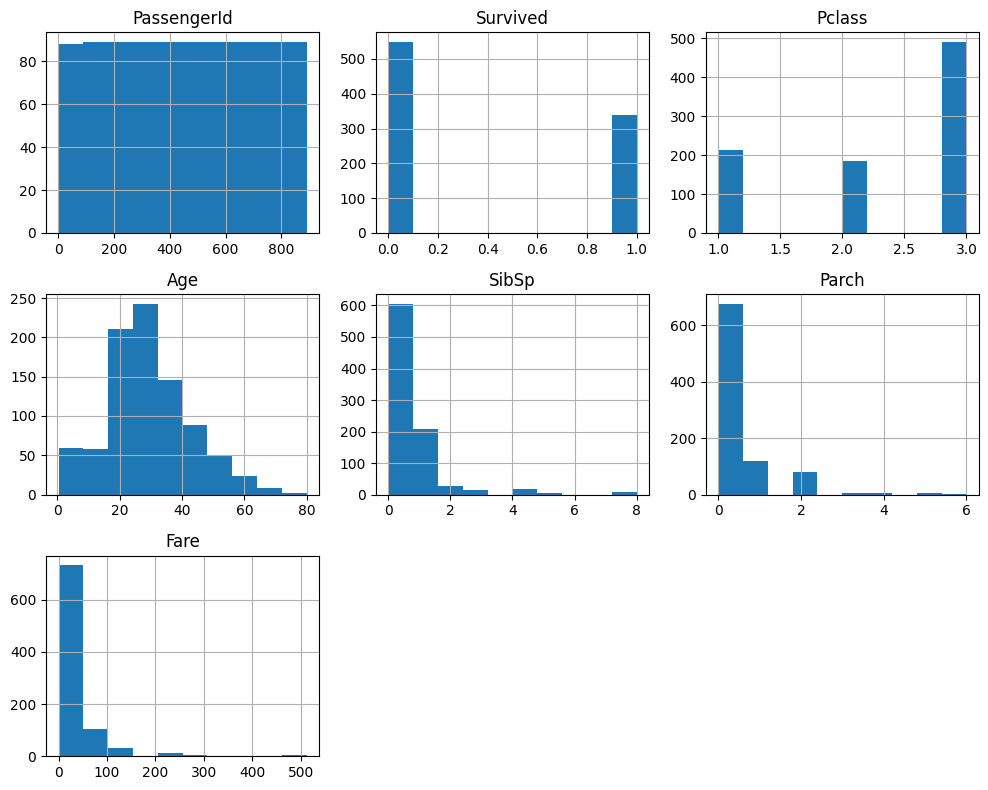

In [13]:
import matplotlib.pyplot as plt
# Select numerical columns
numerical_cols = titanic_df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
titanic_df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Correlation Matrix

Let's visualize the correlation matrix for the numerical features to see the relationships between them.

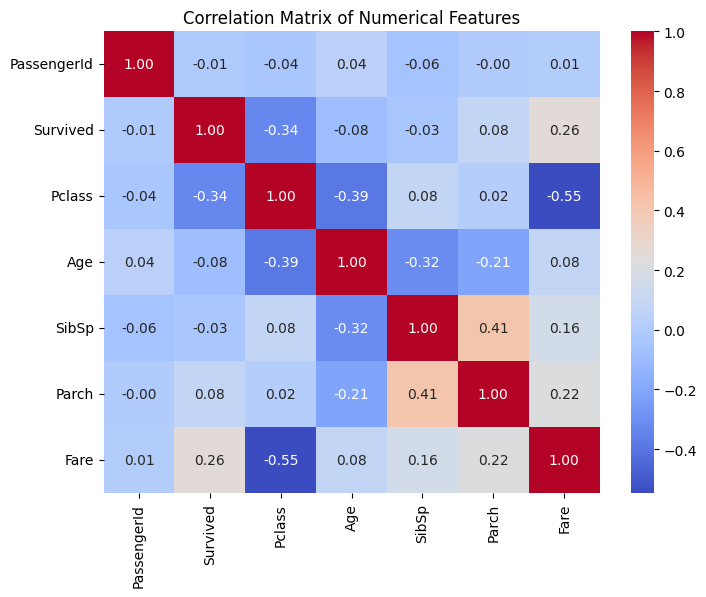

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(titanic_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

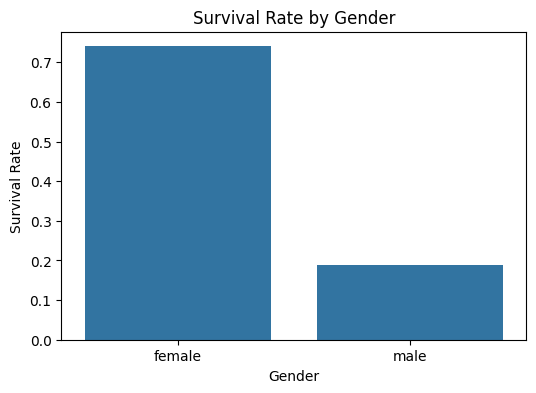

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_survival_rate = titanic_df.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_survival_rate.index, y=gender_survival_rate.values)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

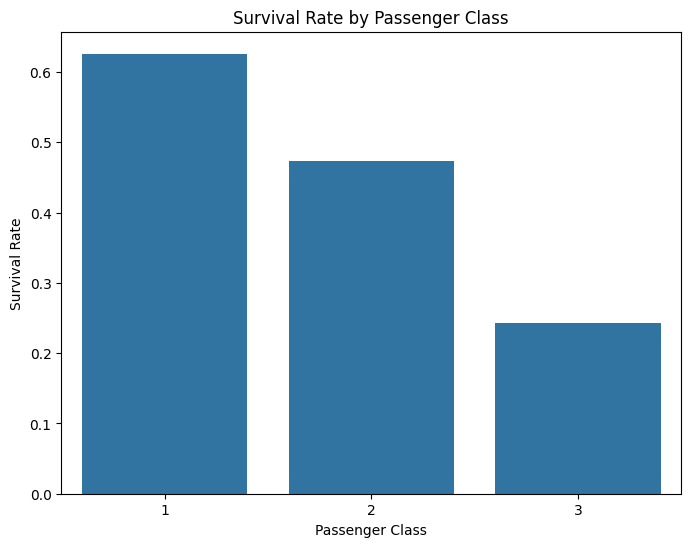

In [21]:
class_survival_rate = titanic_df.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_survival_rate.index, y=class_survival_rate.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

/tmp/ipython-input-3357622413.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival_rate = titanic_df.groupby('AgeGroup')['Survived'].mean().reset_index()


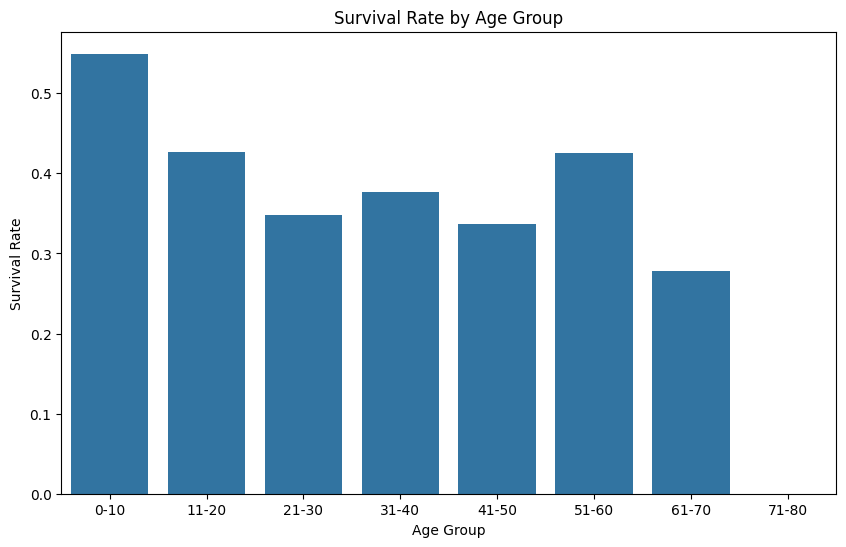

In [23]:
# Define age group bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create 'AgeGroup' column
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rate for each age group
age_group_survival_rate = titanic_df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Create a bar plot to visualize survival rates by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=age_group_survival_rate)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

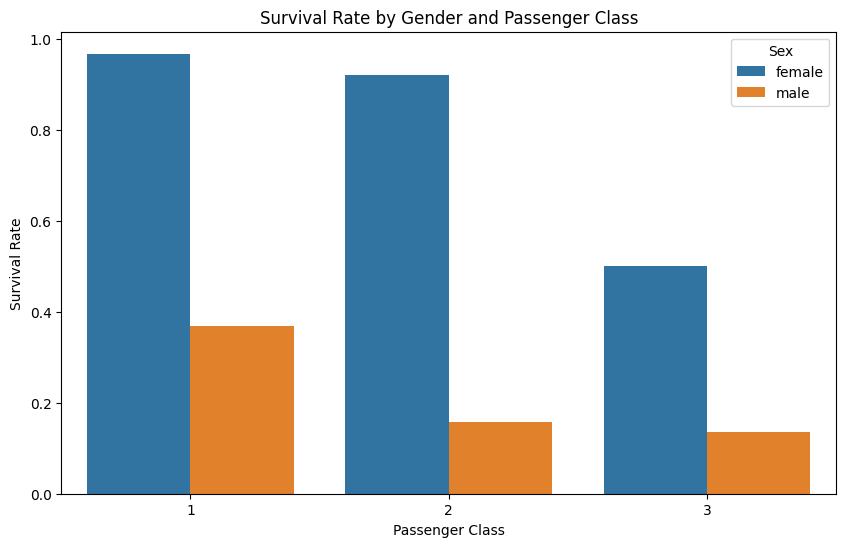

In [24]:
gender_class_survival_rate = titanic_df.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=gender_class_survival_rate)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

/tmp/ipython-input-2013772228.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_survival_rate = titanic_df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().reset_index()


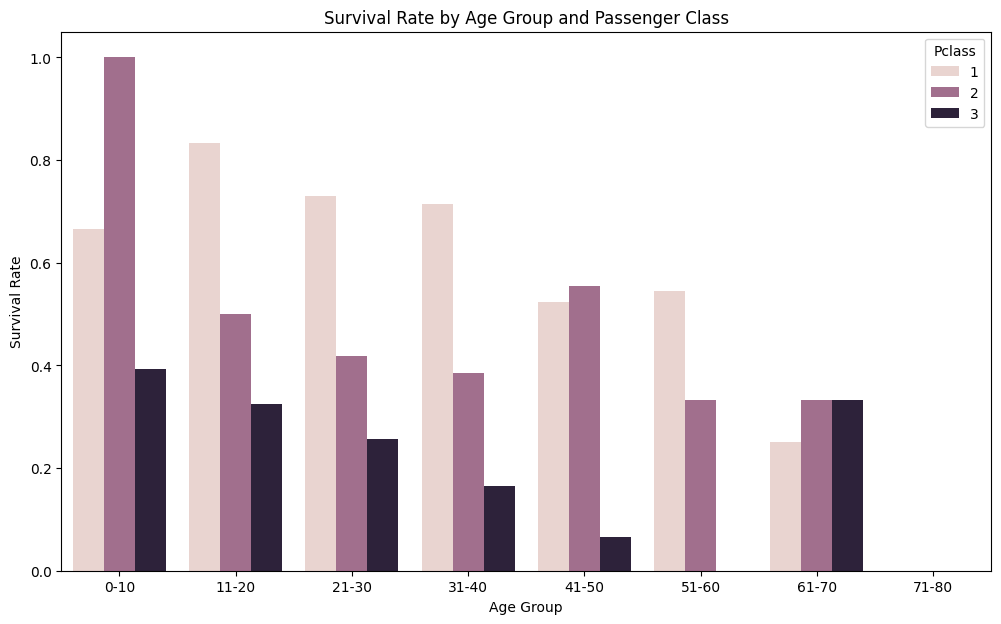

In [25]:
age_class_survival_rate = titanic_df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=age_class_survival_rate)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group and Passenger Class')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Initially, the dataset contained missing values in the 'Age' (177), 'Embarked' (2), and 'Cabin' (687) columns. Missing 'Age' values were imputed with the median, and missing 'Embarked' values were imputed with the mode.
*   Gender had a significant impact on survival rate, with females having a considerably higher survival rate than males.
*   Passenger class was also a crucial factor, with survival rates decreasing from 1st class to 3rd class.
*   Survival rates varied by age group, although the impact was less pronounced compared to gender and class.
*   Analyzing survival rates by gender and class revealed that females in higher classes had the highest survival rates, while males in lower classes had the lowest.
*   Examining survival rates by age group and class showed that the impact of age on survival also depended on the passenger class.

### Insights or Next Steps

*   The analysis clearly demonstrates the "women and children first" protocol and the privilege associated with higher passenger classes during the Titanic disaster.
*   Further analysis could explore the impact of other features like 'Fare', 'SibSp' (number of siblings/spouses aboard), and 'Parch' (number of parents/children aboard) on survival rates, potentially combined with the factors already analyzed.


Survival Rate by Gender within Each Class



In [26]:
from scipy.stats import chi2_contingency

# Analyze survival rate by gender for each class
for pclass in sorted(titanic_df['Pclass'].unique()):
    print(f"\n--- Analyzing Pclass {pclass} ---")
    df_class = titanic_df[titanic_df['Pclass'] == pclass]

    # Create a contingency table of Sex and Survived
    contingency_table = pd.crosstab(df_class['Sex'], df_class['Survived'])
    print("Contingency Table:")
    print(contingency_table)

    # Perform the Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"\nChi-Squared Statistic: {chi2:.2f}")
    print(f"P-value: {p:.4f}")

    # Interpret the results
    alpha = 0.05
    if p < alpha:
        print("Result: There is a statistically significant relationship between Sex and Survival in this class.")
    else:
        print("Result: There is no statistically significant relationship between Sex and Survival in this class (at alpha=0.05).")


--- Analyzing Pclass 1 ---
Contingency Table:
Survived   0   1
Sex             
female     3  89
male      77  45

Chi-Squared Statistic: 77.73
P-value: 0.0000
Result: There is a statistically significant relationship between Sex and Survival in this class.

--- Analyzing Pclass 2 ---
Contingency Table:
Survived   0   1
Sex             
female     6  70
male      91  17

Chi-Squared Statistic: 101.32
P-value: 0.0000
Result: There is a statistically significant relationship between Sex and Survival in this class.

--- Analyzing Pclass 3 ---
Contingency Table:
Survived    0   1
Sex              
female     72  72
male      300  47

Chi-Squared Statistic: 71.68
P-value: 0.0000
Result: There is a statistically significant relationship between Sex and Survival in this class.


Survival rate by age group, gender, and class



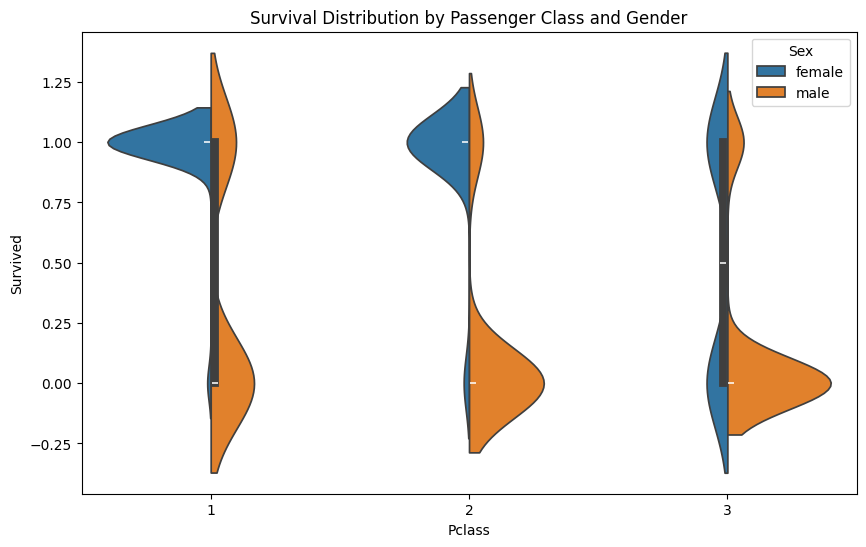

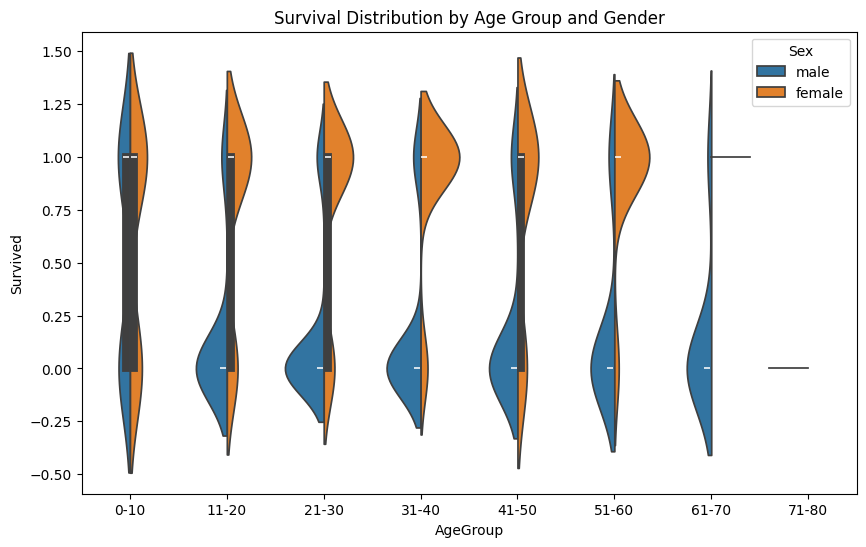

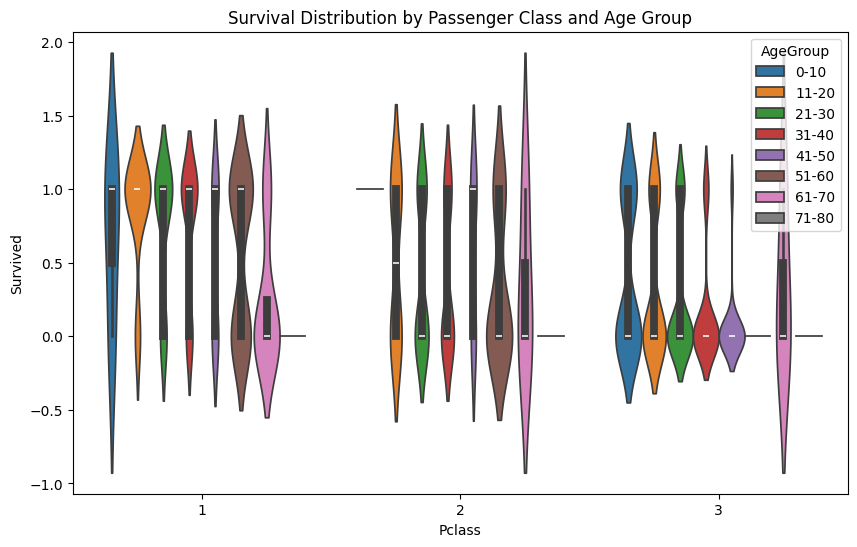

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Survival Rate by Passenger Class and Gender (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, split=True)
plt.title('Survival Distribution by Passenger Class and Gender')
plt.show()

# 2. Survival Rate by Age Group and Gender (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='AgeGroup', y='Survived', hue='Sex', data=titanic_df, split=True)
plt.title('Survival Distribution by Age Group and Gender')
plt.show()

# 3. Survival Rate by Passenger Class and Age Group (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Survived', hue='AgeGroup', data=titanic_df)
plt.title('Survival Distribution by Passenger Class and Age Group')
plt.show()



### Survial Analysis Key Findings

* Passenger class was also a crucial factor, with survival rates decreasing from 1st class to 3rd class, clearly visible in the bar plot and violin plot. The violin plots highlight the different distributions of survival within each class.
* Survival rates varied by age group, with children generally having a higher survival rate than adults and seniors, as shown in the bar plot and violin plot. The violin plots reveal the spread of survival outcomes within each age group.
* The combined effect of gender and class shows that being female and/or being in a higher passenger class significantly increased a passenger's likelihood of surviving. The violin plot of survival by passenger class and gender clearly shows distinct distributions for each group.
* Examining survival rates by age group and class showed that the impact of age on survival also depended on the passenger class, as depicted in the bar and violin plots. The violin plot of survival by passenger class and age group illustrates how age group distributions of survival vary across classes.
* The statistical test confirms that the observed differences in survival rates between genders within each class are highly statistically significant (p-values are all less than 0.05).
